In [ ]:
# Installing these packages for the first time ever

In [ ]:
# Importing these packages (remember to import packages every time)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import seaborn as sns

In [ ]:
#Importing my dataset and Viewing it

In [2]:
Diamonds = shuffle(sns.load_dataset('diamonds'))
Diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
15946,1.00,Premium,G,VS1,62.4,60.0,6377,6.39,6.37,3.98
10657,1.00,Good,G,VS2,56.7,62.0,4838,6.64,6.59,3.75
20202,1.02,Premium,G,IF,61.8,59.0,8643,6.46,6.41,3.98
52154,0.70,Very Good,G,VS1,63.2,58.0,2473,5.61,5.65,3.56
24070,1.60,Premium,H,VS1,60.0,59.0,12210,7.61,7.58,4.56
...,...,...,...,...,...,...,...,...,...,...
34873,0.30,Premium,G,VVS2,61.8,59.0,878,4.26,4.22,2.62
18902,1.42,Premium,F,SI2,59.7,57.0,7755,7.33,7.30,4.37
3654,0.73,Ideal,D,VS2,62.0,56.0,3440,5.74,5.78,3.57
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49


In [3]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 15946 to 29842
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [4]:
Diamonds['carat'].min()

0.2

In [5]:
Diamonds['carat'].max()

5.01

In [6]:
Diamonds['cut'].unique()

['Premium', 'Good', 'Very Good', 'Ideal', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [7]:
Diamonds['color'].unique()

['G', 'H', 'D', 'E', 'F', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [9]:
Diamonds['clarity'].unique()

['VS1', 'VS2', 'IF', 'SI1', 'VVS1', 'VVS2', 'SI2', 'I1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [10]:
cut_dict ={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}
clarity_dict = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}


In [11]:
Diamonds['cut'] = Diamonds['cut'].map(cut_dict)
Diamonds['clarity'] = Diamonds['clarity'].map(clarity_dict)
Diamonds['color'] = Diamonds['color'].map(color_dict)


In [12]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
15946,1.00,4,4,5,62.4,60.0,6377,6.39,6.37,3.98
10657,1.00,2,4,4,56.7,62.0,4838,6.64,6.59,3.75
20202,1.02,4,4,8,61.8,59.0,8643,6.46,6.41,3.98
52154,0.70,3,4,5,63.2,58.0,2473,5.61,5.65,3.56
24070,1.60,4,3,5,60.0,59.0,12210,7.61,7.58,4.56


In [13]:
x = Diamonds[['carat','cut', 'color', 'clarity']]
y = Diamonds['price']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [16]:
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression()

LinearRegression()

In [17]:
predictions = lm.predict(x_test)
predictions

array([2380.58539923,  904.77923407, 6432.56571406, ..., 1938.80714515,
       4033.25399172, 3554.00537918])

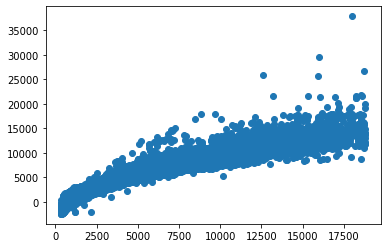

In [18]:
plt.scatter(y_test, predictions)

In [19]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9062361308740251


In [20]:
metrics.mean_absolute_error(y_test, predictions)

852.639445544823

In [21]:
metrics.mean_squared_error(y_test, predictions)

1465596.0288392806

In [22]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1210.6180358970705

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [24]:
kfold = KFold(n_splits = 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
     print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


In [25]:
print(cross_val_score(lm, x,y, cv=3))

[0.90475624 0.90009843 0.90738169]
